In [1]:
import numpy as np
import pandas as pd
import pathlib

import os
import gc

from fastai import *
from fastai.vision import *
from fastai.vision.all import *

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
! unzip '/content/drive/MyDrive/flowers.zip'


Archive:  /content/drive/MyDrive/flowers.zip
   creating: flowers/daisy/
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/d

In [10]:
data_path = '/content/flowers'

In [11]:
tfms_for_item = RandomResizedCrop(128, min_scale=0.35)

tfms_for_batch = [Normalize.from_stats(*imagenet_stats)]

data = ImageDataLoaders.from_folder(data_path, item_tfms=tfms_for_item,
                                    batch_tmfs=tfms_for_batch, valid_pct=0.15, shuffle=True)

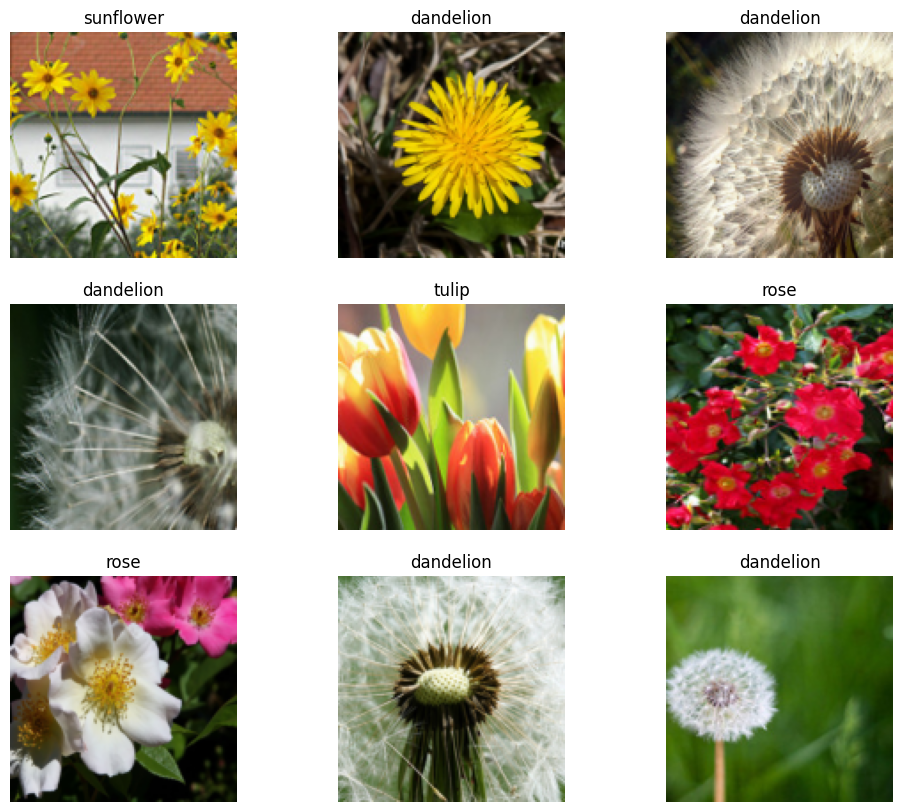

In [12]:
data.show_batch(figsize=(12,10))


In [13]:
model=cnn_learner(data,xresnet50_deeper, metrics=accuracy, model_dir='tmp/model/')

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://s3.amazonaws.com/fast-ai-modelzoo/xrn50_940.pth" to /root/.cache/torch/hub/checkpoints/xrn50_940.pth
100%|██████████| 244M/244M [00:06<00:00, 38.6MB/s]


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


SuggestedLRs(valley=0.0010000000474974513)

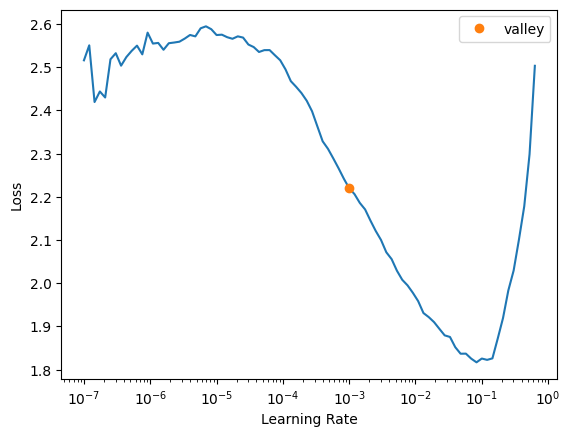

In [14]:
model.lr_find()

In [16]:
model.fit_one_cycle(1, 0.000025) #eslinde 5 10 vererdim ama cox gozledirdi

epoch,train_loss,valid_loss,accuracy,time
0,1.232595,0.803652,0.742284,10:48


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [22]:
model.save('flowers.pkl')

Path('/content/flowers/tmp/model/flowers.pkl.pth')

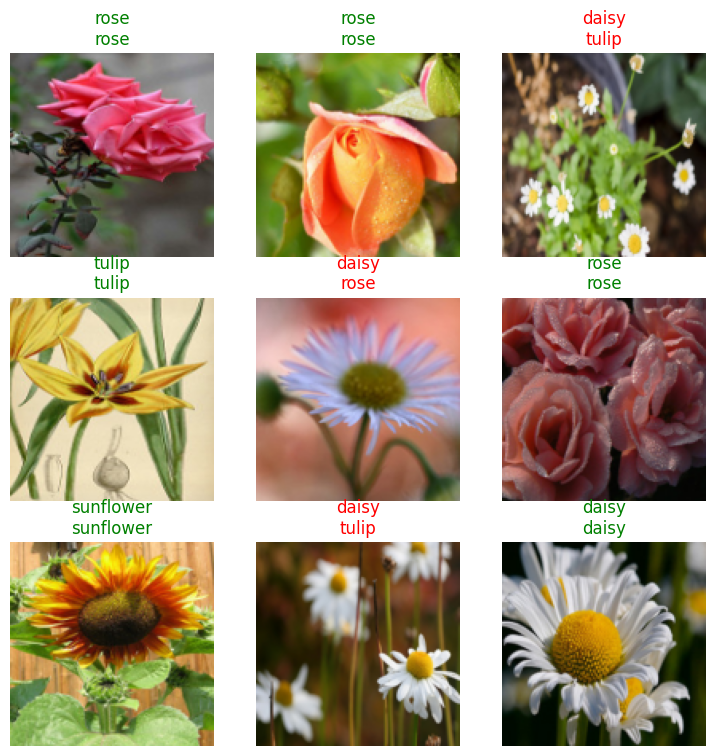

In [18]:
model.show_results()

In [19]:
interp=ClassificationInterpretation.from_learner(model)

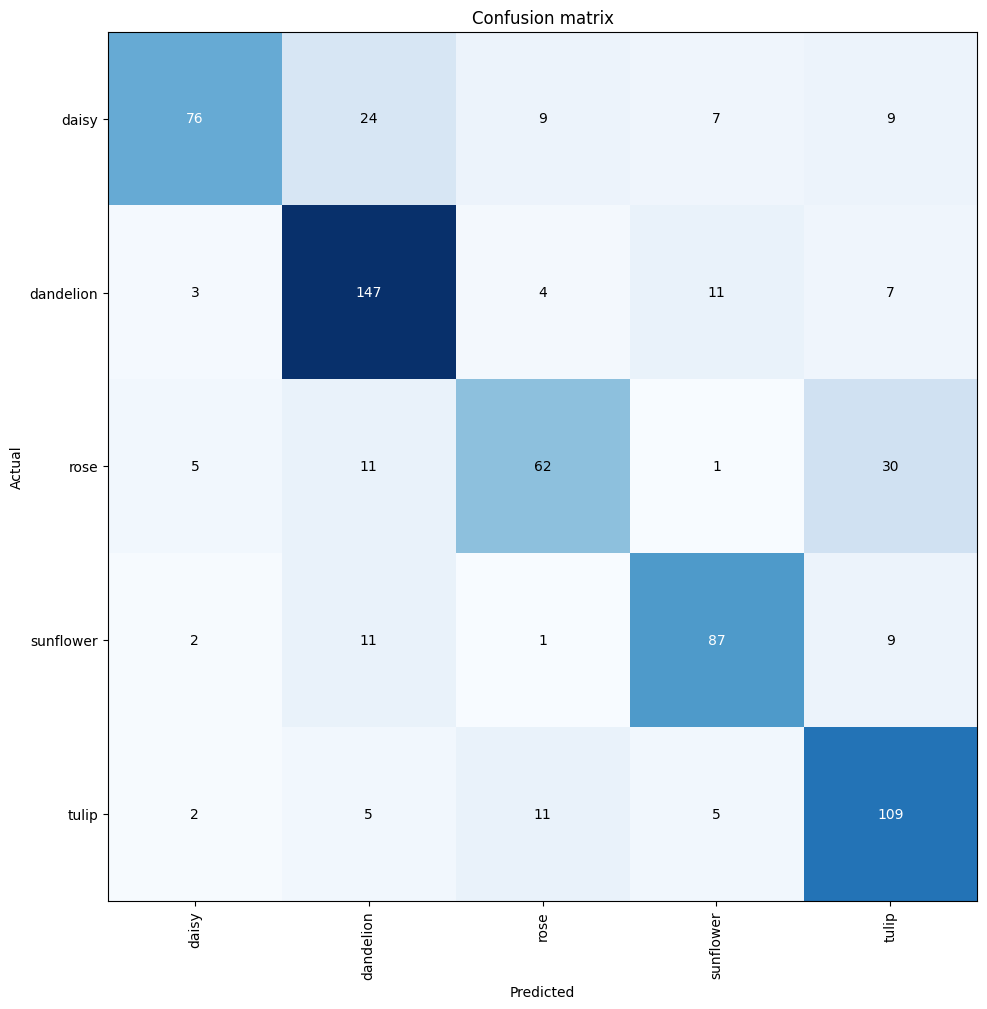

In [20]:
interp.plot_confusion_matrix(figsize=(20,10))

In [21]:
interp.most_confused(min_val=2)

[('rose', 'tulip', 30),
 ('daisy', 'dandelion', 24),
 ('dandelion', 'sunflower', 11),
 ('rose', 'dandelion', 11),
 ('sunflower', 'dandelion', 11),
 ('tulip', 'rose', 11),
 ('daisy', 'rose', 9),
 ('daisy', 'tulip', 9),
 ('sunflower', 'tulip', 9),
 ('daisy', 'sunflower', 7),
 ('dandelion', 'tulip', 7),
 ('rose', 'daisy', 5),
 ('tulip', 'dandelion', 5),
 ('tulip', 'sunflower', 5),
 ('dandelion', 'rose', 4),
 ('dandelion', 'daisy', 3),
 ('sunflower', 'daisy', 2),
 ('tulip', 'daisy', 2)]